In [50]:
import pandas as pd
pd.set_option('display.max_columns', 100)  # set display options in pandas
pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
import pandas_profiling

from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

import pandas_profiling
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import pprint

In [51]:
!python --version  # or check environment.yml file

Python 3.7.1


In [52]:
pd.__version__  # require v0.19 or higher

'0.23.4'

### Get data from Kaggle Rossmann Competition

In [53]:
PATH = Path('d:/dl_dataset/rossmann')  # input your data path here

Inside 'rossmann' directory, you can find below .csv files: 

In [54]:
list(PATH.glob('*.csv'))

[WindowsPath('d:/dl_dataset/rossmann/googletrend.csv'),
 WindowsPath('d:/dl_dataset/rossmann/sample_submission.csv'),
 WindowsPath('d:/dl_dataset/rossmann/state_names.csv'),
 WindowsPath('d:/dl_dataset/rossmann/store.csv'),
 WindowsPath('d:/dl_dataset/rossmann/store_states.csv'),
 WindowsPath('d:/dl_dataset/rossmann/test.csv'),
 WindowsPath('d:/dl_dataset/rossmann/train.csv'),
 WindowsPath('d:/dl_dataset/rossmann/weather.csv')]

In [55]:
table_names = ['googletrend', 'state_names', 'store', 'store_states', 'test', 'train', 'weather']

In [56]:
tables = [pd.read_csv(PATH/f'{filename}.csv', low_memory=False) for filename in table_names]

In [ ]:
googletrend, state_names, store, store_states, test, train, weather = tables

No. of rows for each table:

In [57]:
list(zip([i for i in table_names], [len(table) for table in tables]))

[('googletrend', 2072),
 ('state_names', 16),
 ('store', 1115),
 ('store_states', 1115),
 ('test', 41088),
 ('train', 1017209),
 ('weather', 15840)]

### Have a look of the datasets

In [10]:
googletrend.head()  # show first 5 lines

,file,week,trend
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95
2,Rossmann_DE_SN,2012-12-16 - 2012-12-22,91
3,Rossmann_DE_SN,2012-12-23 - 2012-12-29,48
4,Rossmann_DE_SN,2012-12-30 - 2013-01-05,67


In [11]:
state_names.tail()  # show the last 5 lines

,StateName,State
11,Saarland,SL
12,Sachsen,SN
13,SachsenAnhalt,ST
14,SchleswigHolstein,SH
15,Thueringen,TH


In [12]:
store.head().T  # use transpost if too many columns)

,0,1,2,3,4
Store,1,2,3,4,5
StoreType,c,a,a,c,a
Assortment,a,a,a,c,a
CompetitionDistance,1270,570,14130,620,29910
CompetitionOpenSinceMonth,9,11,12,9,4
CompetitionOpenSinceYear,2008,2007,2006,2009,2015
Promo2,0,1,1,0,0
Promo2SinceWeek,NaN,13,14,NaN,NaN
Promo2SinceYear,NaN,2010,2011,NaN,NaN
PromoInterval,NaN,"Jan,Apr,Jul,Oct","Jan,Apr,Jul,Oct",NaN,NaN


In [13]:
store_states.head(2)  # specify number of rows to display 

,Store,State
0,1,HE
1,2,TH


In [14]:
test.tail(2)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
41086,41087,1114,6,2015-08-01,1.0,0,0,0
41087,41088,1115,6,2015-08-01,1.0,0,0,1


In [15]:
train.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1


In [16]:
weather.head(2).T

,0,1
file,NordrheinWestfalen,NordrheinWestfalen
Date,2013-01-01,2013-01-02
Max_TemperatureC,8,7
Mean_TemperatureC,4,4
Min_TemperatureC,2,1
Dew_PointC,7,5
MeanDew_PointC,5,3
Min_DewpointC,1,2
Max_Humidity,94,93
Mean_Humidity,87,85


### Data Profiling

In [17]:
state_names.describe()

,StateName,State
count,16,16
unique,16,16
top,BadenWuerttemberg,NW
freq,1,1


In [18]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [19]:
dir(train)

['Customers',
 'Date',
 'DayOfWeek',
 'Open',
 'Promo',
 'Sales',
 'SchoolHoliday',
 'StateHoliday',
 'Store',
 'T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',


In [20]:
pandas_profiling.ProfileReport(train)

Number of variables,9
Number of observations,1017209
Total Missing (%),0.0%
Total size in memory,69.8 MiB
Average record size in memory,72.0 B
Numeric,4
Categorical,2
Boolean,3
Date,0
Text (Unique),0
Rejected,0


### Check Missing Data Values - NaN

In [21]:
state_names.isnull()

,StateName,State
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [22]:
train.isna().sum()  # count missing values for each column

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [23]:
count_nan = len(test) - test.count()
count_nan  # 11 null cells in test.Open

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [24]:
test[test.Open.isna()]  # select missing rows 

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0


### Data Visualisation (using Pandas)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000205E51CD2E8>]],
      dtype=object)

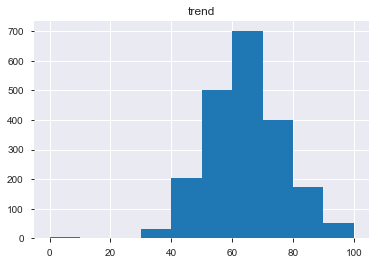

In [58]:
googletrend.hist(bins = 10)

In [83]:
googletrend.iplot()

In [ ]:
state_names.hist(bins=10)  # warning: can't generate histogram for catagorical columns!

In [59]:
state_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
StateName    16 non-null object
State        16 non-null object
dtypes: object(2)
memory usage: 336.0+ bytes


Store


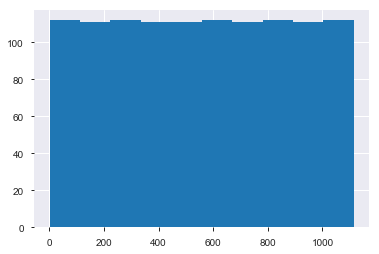

StoreType
Can't generate histogram for StoreType column.
Assortment
Can't generate histogram for Assortment column.
CompetitionDistance


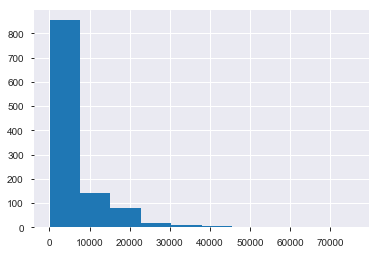

CompetitionOpenSinceMonth


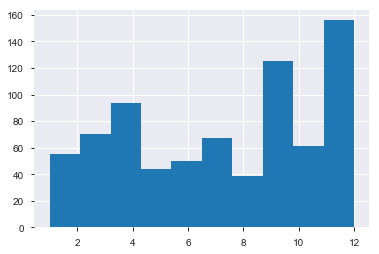

CompetitionOpenSinceYear


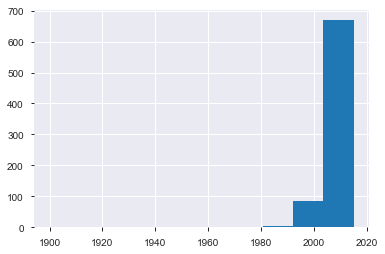

Promo2


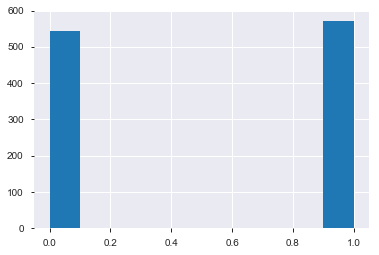

Promo2SinceWeek


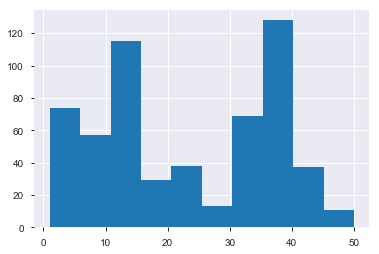

Promo2SinceYear


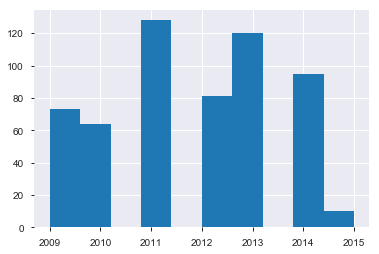

PromoInterval
Can't generate histogram for PromoInterval column.


In [60]:
for i in store.columns:
    print(i)
    if str(store[str(i)].dtype) == 'object':
        print(f"Can't generate histogram for", i, "column.")
    else:
        store[str(i)].hist(bins=10)
    plt.show()

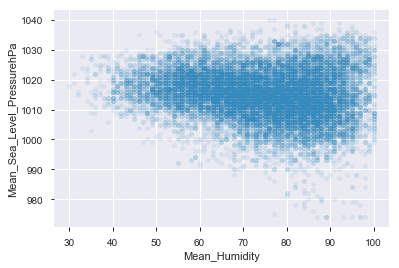

In [78]:
weather.plot(x='Mean_Humidity', y='Mean_Sea_Level_PressurehPa', kind='scatter', alpha=0.1)

In [82]:
weather.pivot(columns='CloudCover', values='Mean_Humidity').head()

CloudCover,nan,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.0,NaN


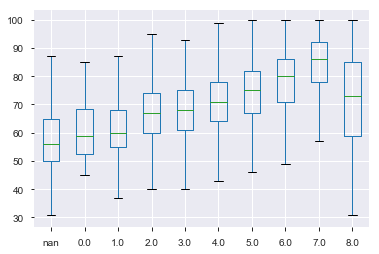

In [91]:
weather.pivot(columns='CloudCover', values='Mean_Humidity').plot(kind='box')

### Inspect possible outliers / set more complex conditions than .iloc

In [32]:
cond_1 = (weather['Min_DewpointC'] < -10)
cond_2 = (weather['Max_Wind_SpeedKm_h'] > 30)

In [33]:
weather[cond_1 & cond_2]  # and condition

,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressurehPa,Mean_Sea_Level_PressurehPa,Min_Sea_Level_PressurehPa,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
82,NordrheinWestfalen,2013-03-24,3,-1,-4,-9,-13,-16,59,36,14,1016,1015,1013,31.0,30.0,26.0,39,26,NaN,0.00,8.0,NaN,57
83,NordrheinWestfalen,2013-03-25,4,0,-4,-9,-10,-12,59,44,23,1016,1014,1012,31.0,29.0,26.0,40,29,55.0,0.00,NaN,NaN,53
84,NordrheinWestfalen,2013-03-26,5,1,-4,-8,-9,-11,64,46,21,1014,1013,1011,31.0,31.0,31.0,34,21,NaN,0.00,NaN,NaN,51
1071,Niedersachsen,2013-03-23,-2,-4,-6,-7,-12,-16,80,52,24,1026,1024,1022,31.0,16.0,10.0,45,34,61.0,0.00,5.0,Snow,90
1072,Niedersachsen,2013-03-24,1,-4,-9,-9,-14,-18,59,40,16,1026,1023,1020,31.0,28.0,26.0,45,32,61.0,0.00,NaN,NaN,91
1073,Niedersachsen,2013-03-25,2,-2,-6,-9,-11,-12,68,49,25,1022,1020,1018,31.0,19.0,10.0,43,32,63.0,0.00,3.0,NaN,83
1074,Niedersachsen,2013-03-26,3,-1,-6,-8,-9,-11,74,52,25,1019,1017,1015,31.0,18.0,10.0,40,23,55.0,0.00,4.0,NaN,78
1075,Niedersachsen,2013-03-27,4,-2,-7,-7,-10,-73,86,57,4,1022,1015,1013,31.0,24.0,10.0,35,18,50.0,0.00,6.0,NaN,78
2707,Bayern,2014-12-29,-4,-10,-15,-5,-9,-16,100,92,85,1033,1029,1025,10.0,7.0,1.0,37,18,NaN,0.00,7.0,Snow,265
2711,Bayern,2015-01-02,3,-4,-11,2,-3,-12,100,96,87,1034,1031,1029,10.0,6.0,1.0,35,11,NaN,0.00,7.0,Fog-Rain,243


In [34]:
weather[cond_1 | cond_2]  # or condition

,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressurehPa,Mean_Sea_Level_PressurehPa,Min_Sea_Level_PressurehPa,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,NordrheinWestfalen,2013-01-01,8,4,2,7,5,1,94,87,65,1013,1005,1001,31.0,12.0,4.0,39,26,58.0,5.08,6.0,Rain,215
25,NordrheinWestfalen,2013-01-26,0,-2,-4,-1,-4,-6,100,81,64,1013,1011,1009,26.0,11.0,3.0,34,24,48.0,0.00,7.0,Rain-Snow,158
26,NordrheinWestfalen,2013-01-27,4,2,-1,3,1,-2,95,86,75,1013,1005,1001,26.0,12.0,5.0,35,21,53.0,3.05,7.0,Rain-Snow,174
27,NordrheinWestfalen,2013-01-28,6,3,0,3,2,-1,93,84,72,1014,1011,1006,31.0,15.0,10.0,32,18,NaN,0.25,6.0,Rain,190
28,NordrheinWestfalen,2013-01-29,12,8,3,10,8,3,96,88,73,1009,1008,1006,31.0,12.0,6.0,45,31,61.0,6.10,7.0,Rain,216
29,NordrheinWestfalen,2013-01-30,13,11,9,11,8,4,94,79,56,1014,1007,1004,31.0,12.0,5.0,47,32,60.0,3.05,5.0,Rain-Thunderstorm,233
30,NordrheinWestfalen,2013-01-31,9,8,7,5,3,2,81,71,53,1016,1013,1009,31.0,14.0,10.0,50,32,64.0,0.51,5.0,Rain,237
33,NordrheinWestfalen,2013-02-03,6,4,2,4,2,-2,95,85,54,1020,1015,1010,31.0,11.0,5.0,37,21,53.0,0.51,7.0,Rain-Snow,253
34,NordrheinWestfalen,2013-02-04,10,7,3,8,4,1,100,81,50,1011,1009,1008,31.0,9.0,4.0,32,24,47.0,0.51,7.0,Rain,248
35,NordrheinWestfalen,2013-02-05,5,3,1,3,1,-2,95,80,60,1009,1000,997,31.0,13.0,8.0,45,24,66.0,5.08,5.0,Rain-Snow-Hail,231


### Handling large data

To speed up the process, only use first 100 rows or less to test your code:

### Other useful functions

In [35]:
# list all columns
googletrend.columns

Index(['file', 'week', 'trend'], dtype='object')

In [36]:
# drop/delete columns
googletrend.drop(['file', 'week'], axis=1, inplace=True)
googletrend.columns

Index(['trend'], dtype='object')

In [37]:
json = {"user_input": {"dates": [[["2019-02-09T17:00:00.000Z", "2019-02-11T01:00:00.000Z"],["2019-02-18T17:00:00.000Z", "2019-03-05T01:00:00.000Z"]]],"1pc_change": 500,"hours_per_day": 16}}
print(f'1st item:', json)

1st item: {'user_input': {'dates': [[['2019-02-09T17:00:00.000Z', '2019-02-11T01:00:00.000Z'], ['2019-02-18T17:00:00.000Z', '2019-03-05T01:00:00.000Z']]], '1pc_change': 500, 'hours_per_day': 16}}


In [38]:
pprint.pprint(json)

{'user_input': {'1pc_change': 500,
                'dates': [[['2019-02-09T17:00:00.000Z',
                            '2019-02-11T01:00:00.000Z'],
                           ['2019-02-18T17:00:00.000Z',
                            '2019-03-05T01:00:00.000Z']]],
                'hours_per_day': 16}}


In [39]:
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"

In [40]:
1+2
2+3
3+4

3

5

7

In [41]:
InteractiveShell.ast_node_interactivity = "last_expr"  # to deactivate

(Un)comment code using Ctrl + /

Undo delete using Ctrl + z or Edit > Undo Delete Cells

### Next step: refer to rossman_data_clean.ipynb for data preparation / feature engineering